## A. Considerations for building the dataset

When building a dataset for detecting deepfake face images, it's important to consider several key factors to ensure that the resulting machine learning models are robust, reliable, and ethical. Here are the key considerations:

1. **Diversity**
A diverse dataset is crucial for training a model that can generalize well across a wide range of inputs. The dataset should include images that vary in:

* Age: Include faces of individuals from different age groups.
* Gender: Ensure a balanced representation of different genders.
* Skin Color: Incorporate a wide spectrum of skin tones.
* Race / Ethnicity: incorporating a wide distribution of ethnicities. 
* Facial Expressions: Include varying facial expressions to ensure the model can handle different expressions.
* Lighting Conditions: Include images taken under different lighting conditions to ensure the model is robust to changes in lighting.

**NOTE**: The debate on skin color vs race / ethnicity is on-going and should be selected based on experimental needs. Several papers have shown that using skin color as a proxy to racial or ethnicity grouping. However, while skin color can be easily computed without subjective annotations, it has many limitations such as, illumination and lighting conditions, within-group variations of skin color are massive, race is multidimensional while skin color is uni-dimensional 

2. **Bias**
Bias in the dataset can lead to biased outcomes from the model. Biased datasets have been a prominent issue in machine learning and can result in unfair or discriminatory practices. It's important to actively identify and mitigate biases during dataset creation. This can be done by:

* Ensuring a balanced representation of different groups (as mentioned in the diversity section).
* Evaluating and addressing potential sources of bias during data collection.

3. **Quality**
The quality of the images in the dataset plays a major role in the performance of the model. Images should be:

* Clear: The facial features should be clearly visible.
* Well-lit: Good lighting is important for discerning facial features.
* High Resolution: Low-resolution images may lack the detail necessary for accurate deepfake detection.

4. **Variety in Deepfake Sources**
Deepfake technologies vary greatly in quality and method. Therefore, to train a model that can detect a wide range of deepfakes, it's important to include fake images from a variety of sources. This helps ensure the model isn't overfitting to a specific type or quality of deepfake.

5. **Ethics and Privacy**
Ethical considerations should be at the forefront when creating the dataset. We must:

* Ensure the images are publicly available.
* Respect privacy regulations and not use images without proper consent.
* Respect copyrights and not use images without proper authorization.
* By taking these factors into consideration, we can build a robust and ethical dataset for deepfake detection.

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

## B. How I went about collecting the data? 

1. I searched across various platforms like GitHub, Kaggle, and research publications for relevant datasets. This included looking for datasets that specifically contained real and fake face images, as well as datasets that provided a diverse set of facial images in terms of demographics, expressions, and quality. The following datasets are just a sample of what was looked at for this project:

* https://openaccess.thecvf.com/content/WACV2021/papers/Karkkainen_FairFace_Face_Attribute_Dataset_for_Balanced_Race_Gender_and_Age_WACV_2021_paper.pdf
* https://github.com/deepfakeinthewild/deepfake-in-the-wild
* https://github.com/SkyThonk/real-and-fake-face-detection 
* https://github.com/microsoft/FaceSynthetics (this is for synthetic faces which isn't relevant in this scenario)
* https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection?resource=download

**Others were looked at but not used**

2. If this were in a professional environment there should be extensive testing of the datasets on their biases and distribution of **important metrics** (pre-determined by researchers) to make sure the dataset is wholistic

3. The dataset used contains **expert-generated high-quality** photoshopped face images. The images are composite of different faces, separated by eyes, nose, mouth, or whole face.


---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

## C. what other labels would you consider? And provide a sample method? 

**LABELS** 
* **Demographics**: Age, gender, ethnicity, etc. These could be useful for ensuring the model works well across diverse populations and doesn't learn biased representations.

* **Facial Expressions**: Happy, sad, angry, surprised, etc. These could be useful for emotion detection tasks.

* **Facial Landmarks**: Locations of eyes, nose, mouth, etc. These could be useful for tasks that involve understanding facial structure, such as facial recognition or facial feature editing.

* **Lighting Conditions**: Bright, dim, harsh shadows, etc. These could be useful for ensuring the model works under different lighting conditions.

* **Image Quality**: High resolution, low resolution, blurry, etc. These could be useful for ensuring the model works with different quality images.

* **Pose**: Frontal, profile, tilted, etc. These could be useful for ensuring the model works with faces in different orientations.


* 
**METHOD**: for sampling a uniform dataset in the i.i.d sense given the labels

* Identify the smallest class size: Count the number of samples in each label category and find the smallest class size. Let's call this number n.

* Sample n instances from each label category: Randomly select n instances from each label category to create a balanced dataset. This ensures that each label category is represented equally and the dataset is uniform.

* Combine the sampled instances from each label category: Merge the sampled instances from each label category to form the final uniform dataset.

**By following this method, you can create a dataset where each label category is represented equally, promoting a balanced and unbiased training process.**

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

## D. What API used to store and organize meta information about the dataset????

API used: I used Kaggle API for obtaining the dataset

Datastructures used: pandas dataframe, numpy were used for the store the metadata and then used a .csv file for simplicity to store any metadata locally 

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

## E. Please share your mini-dataset as a zip file

zip file can be found in the **real-and-fake-face-detection.zip** file 

---------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------

# CODE USED FOR QUESTION 1 DOWN BELOW 

In [8]:
# install kaggle API and used for kaggle dataset download
!pip install kaggle


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\derek\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
# libraries needed for the project - if you don't have any of them, install them using pip install <library name>

import pandas as pd
import numpy as np
import cv2 # for image processing
import shutil
import glob
import random
import os
import requests
import kaggle # for downloading the dataset you need to have the kaggle.json file in your folder where it stores the api key
from PIL import Image
import matplotlib.pyplot as plt # for plotting the images
print(os.listdir("c:/Users/derek/cs_projects/reality_defender_tech/question_1"))  # print the content of the specified directory



['dataset', 'design_build.ipynb', 'explanations.md', 'real-and-fake-face-detection.zip', 'real_and_fake_face']


In [13]:
# Make sure that your Kaggle API key is in the correct location (~/.kaggle/kaggle.json)

# Define the path to the dataset you want to download
dataset_path = "ciplab/real-and-fake-face-detection"

# Download the dataset
kaggle.api.dataset_download_files(dataset_path, path='./', unzip=True)

print("Download complete!")


Download complete!


In [6]:
fake_folder = "./real_and_fake_face/training_fake"
real_folder = "./real_and_fake_face/training_real"

real_path = os.listdir(real_folder)
fake_path = os.listdir(fake_folder)

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

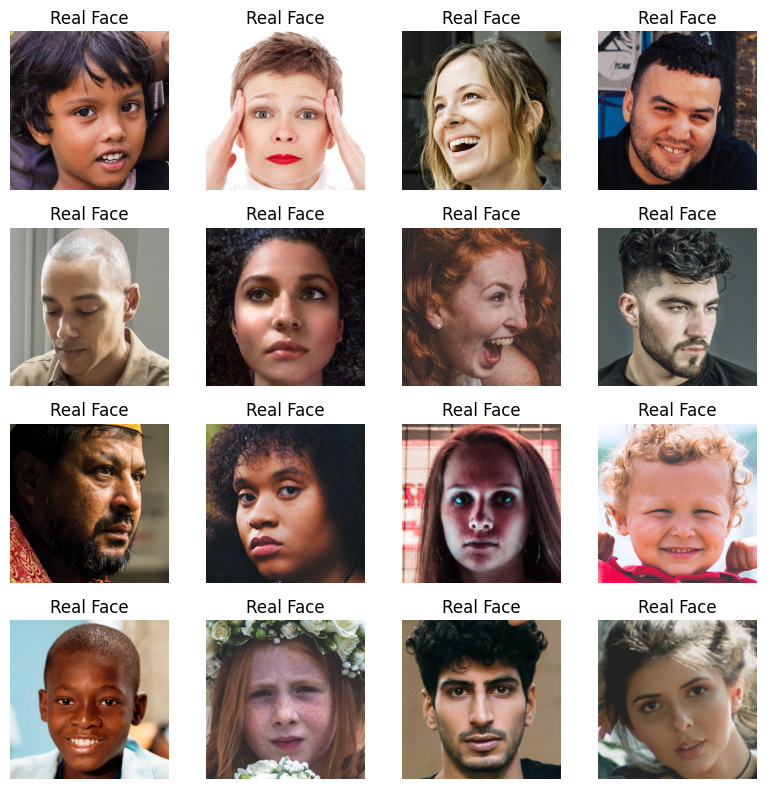

In [9]:
# Create a figure with a 4x4 grid of subplots
fig = plt.figure(figsize=(8, 8))

# Display 16 real images
for i in range(16):
    image_path = os.path.join(real_folder, real_path[i])
    image = Image.open(image_path)
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(image, cmap='gray')
    ax.set_title("Real Face")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [2]:
# Create a function to create the dataset now that we've downloaded the images

def create_dataset(source_folder_fake, source_folder_real, destination_folder, num_images):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Get a list of fake and real image files from the folder listed above 
    fake_files = os.listdir(source_folder_fake)
    real_files = os.listdir(source_folder_real)

    # Randomly select fake and real images -- doing random so that we don't have a bias in the dataset, however, we should do some testing if there was any bias in the dataset
    num_fake_images = min(num_images // 2, len(fake_files))  # Number of fake images to include
    num_real_images = min(num_images - num_fake_images, len(real_files))  # Number of real images to include

    selected_fake_files = random.sample(fake_files, num_fake_images)
    selected_real_files = random.sample(real_files, num_real_images)

    # Copy the selected fake images to the destination folder and label them as fake
    for file_name in selected_fake_files:
        source_path = os.path.join(source_folder_fake, file_name)
        destination_path = os.path.join(destination_folder, "fake_" + file_name)
        shutil.copyfile(source_path, destination_path)

    # Copy the selected real images to the destination folder and label them as real
    for file_name in selected_real_files:
        source_path = os.path.join(source_folder_real, file_name)
        destination_path = os.path.join(destination_folder, "real_" + file_name)
        shutil.copyfile(source_path, destination_path)

    print("Dataset creation complete! The dataset contains 75 fake images and 75 real images that were randomly selected from the original dataset.")

# Set the paths for the source folders and the destination folder for the new dataset
fake_folder = "./real_and_fake_face/training_fake"
real_folder = "./real_and_fake_face/training_real"
destination_folder = "./dataset"
num_images = 150




In [3]:
# Call the function to create the dataset with a mix of fake and real images
create_dataset(fake_folder, real_folder, destination_folder, num_images)

Dataset creation complete! The dataset contains 75 fake images and 75 real images that were randomly selected from the original dataset.


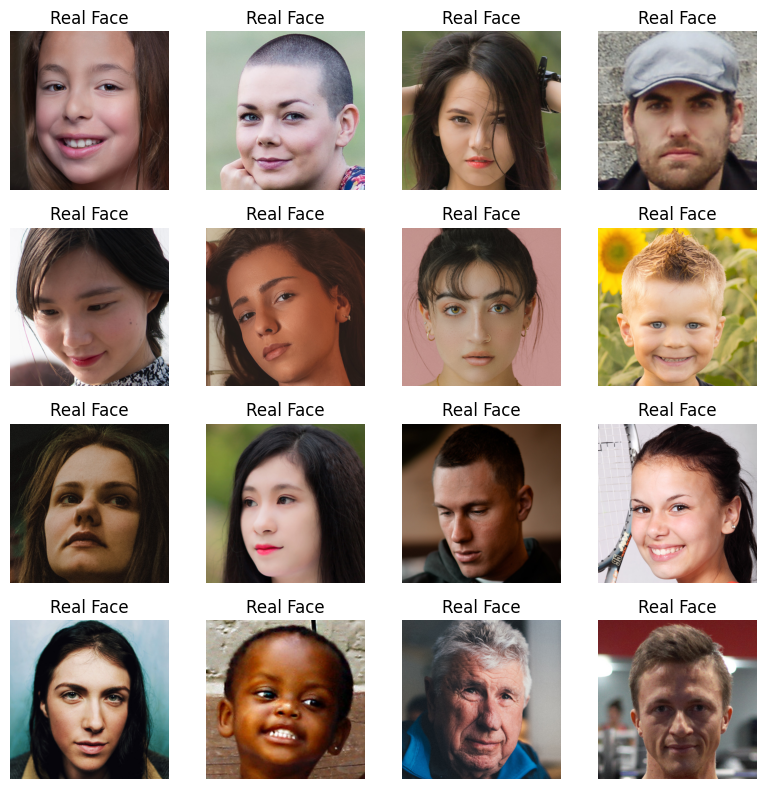

In [40]:
# Create a function to plot a random selection of real images form the newly created dataset

def plot_random_real_images(folder_path, num_images=16):
    file_names = os.listdir(folder_path)

    # Filter files that contain the word "real" in their filenames
    real_images = [file for file in file_names if "real" in file]

    # Randomly select the specified number of images
    selected_images = random.sample(real_images, num_images)

    # Create a figure with a 4x4 grid of subplots
    fig = plt.figure(figsize=(8, 8))

    # Plot the selected images
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path)
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(image, cmap='gray')
        ax.set_title("Real Face")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot 16 random real images from the folder
folder_path = "./dataset"
plot_random_real_images(folder_path, num_images=16)




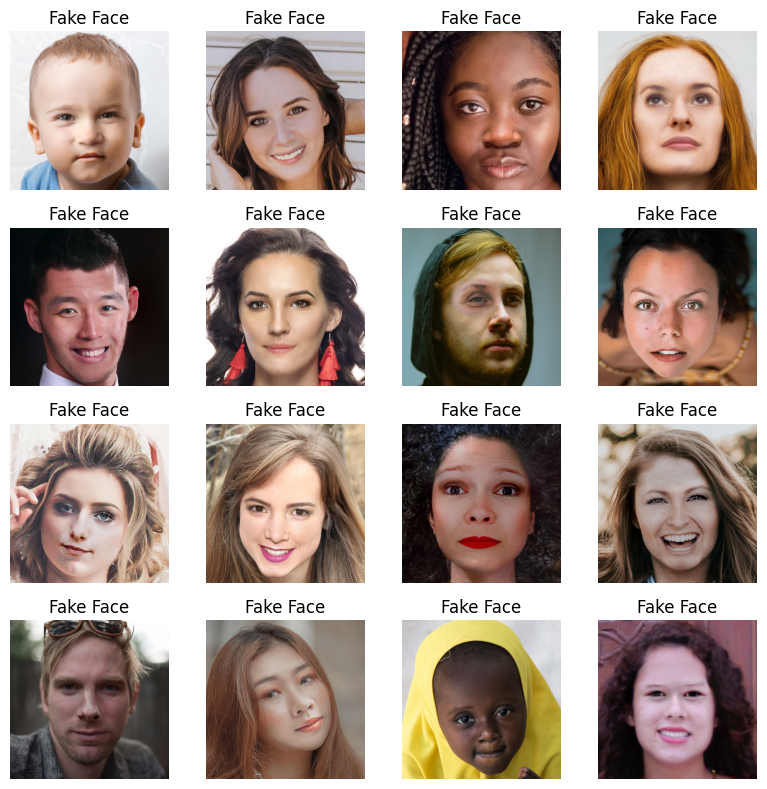

In [41]:
# Create a function to plot a random selection of fake images form the newly created dataset

def plot_random_fake_images(folder_path, num_images=16):
    file_names = os.listdir(folder_path)

    # Filter files that contain the word "fake" in their filenames
    fake_images = [file for file in file_names if "fake" in file]

    # Randomly select the specified number of images
    selected_images = random.sample(fake_images, num_images)

    # Create a figure with a 4x4 grid of subplots
    fig = plt.figure(figsize=(8, 8))

    # Plot the selected images
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path)
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(image, cmap='gray')
        ax.set_title("Fake Face")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot 16 random fake images from the folder
folder_path = "./dataset"
plot_random_fake_images(folder_path, num_images=16)


In [ ]:
import zipfile

def create_zip_file(folder_path, zip_file_path):
    # Create a zip file
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Iterate over the files in the folder
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Add each file to the zip file
                zipf.write(file_path, arcname=os.path.relpath(file_path, folder_path))

# Specify the folder path and the zip file path
folder_path = "./dataset"
zip_file_path = "./dataset.zip"

# Create the zip file
create_zip_file(folder_path, zip_file_path)
